# ITC6125 HW1 - Polynomial Curve Fitting and Decision Theory

# Prof. Dimitrios Milioris

Learning contents:

1. Linear models
    - Linear function
    - Error function
    - Root meant square error
    - Optimization of Error function
    - Test the model
2. Regularization
    - Error function
    - Optimization
    - Test with regularization
3. Model Selection
    - Cross-validation
4. Bayesian curve fitting
    - Display results

## Description

In this exercise we will apply Linear Models for Polynomial Curve Fitting task.

You have to fill empty functions (with pass in body) to match their purpose.

1. You have to create a code for evaluation of a Linear Model, it's error functions and finding optimal weights with given error functions.
2. You need to add regularization to the optimization procedure.
3. You need to implement Cross-validation model selection technique.
4. You need to implement Bayesian curve fitting, computing phi and S matricies at first, then using them to compute mean and variance.

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import  exp

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [2]:
# Defining the target function
def target_func(x):
    return np.sin(2*np.pi*x)

# Generating training and test data using a fixed random seed
def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = target_func(x_test)
    return x_train, y_train, x_test, y_test

# Generating 10 training examples and their targets, and 100 test examples and their targets
x_train, y_train, x_test, y_test = generate_data(10)

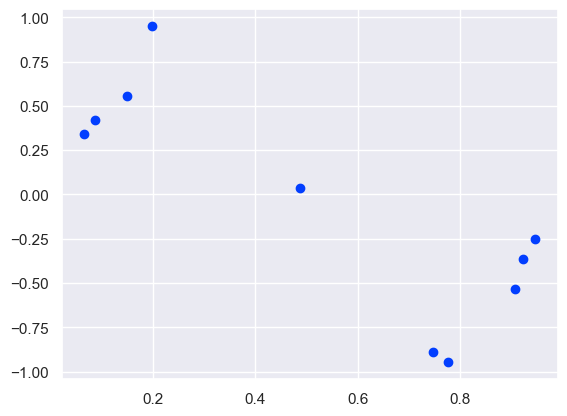

In [3]:
plt.scatter(x_train, y_train)

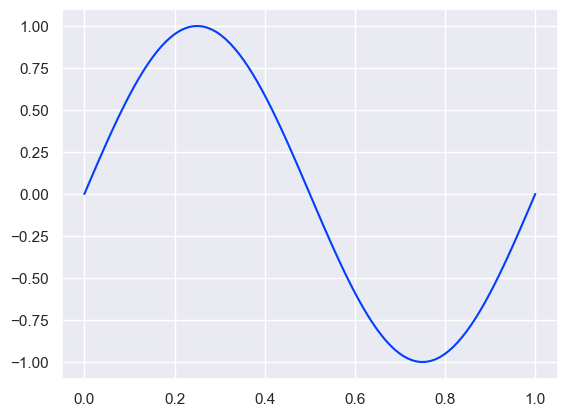

In [4]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

### 1.1) Linear function

`linear` takes data point `x` and a list of `weights` as parameters 

In [5]:
# Define a linear regression model
def linear(x, weights):
    # Generate the design matrix X by raising x to the power of each integer from 0 to len(weights)-1
    X = np.array([x**m for m in range(len(weights))]).T
    
    # Compute the dot product of X and weights to get the predicted output
    return np.dot(X, weights)

### 1.2) Error function

`err` is a sum-of-squares error function that takes `weights`, `inputs` and `targets` as parameters

In [6]:
# Define a function to compute the sum of squared errors between the targets and the predictions
def err(weights, inputs, targets):
    # Compute the predicted output using the linear regression model defined earlier
    predictions = linear(inputs, weights)
    
    # Compute the sum of squared errors between the predictions and the targets
    return np.sum((targets - predictions)**2)

### 1.3) Root meant square error

In [7]:
# Define a function to compute the root-mean-square error between the targets and the predictions
def erms(weights, inputs, targets):
    # Compute the sum of squared errors using the previously defined 'err' function
    sse = err(weights, inputs, targets)
    
    # Divide the sum of squared errors by the number of targets and take the square root
    return np.sqrt(sse / len(targets))

### 1.4) Optimization of Error function

`optimial_weights` takes `inputs`, `targets`, and `M` (number of weights) as parameters and returns optimal weights for this data

In [8]:
# Define a function to compute the optimal weights for a polynomial regression model
def optimal_weights(inputs, targets, M):
    if M == 0:
        return np.array([0])
    
    # Generate the design matrix X
    X = np.array([inputs**m for m in range(M)]).T
    
    # Compute the optimal weights using the pseudo-inverse of X
    return np.linalg.pinv(X.T @ X) @ X.T @ targets

### 1.5) Test the model

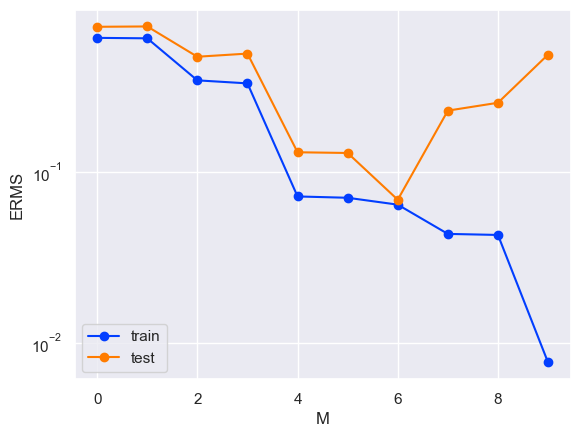

In [9]:
# Define a function to test polynomial regression models of different degrees
def test_all(start_M, end_M, x_train, y_train, x_test, y_test):
    results_train = []
    results_test = []
    all_weights = []
    
    # Loop over the degrees of the polynomial model
    for M in range(start_M, end_M + 1):
        # Compute the optimal weights for the current degree
        weights = optimal_weights(x_train, y_train, M)
        all_weights.append(weights)
        
        # Compute the RMSE on the training and test data
        error_train = erms(weights, x_train, y_train)
        error_test = erms(weights, x_test, y_test)
        results_train.append(error_train)
        results_test.append(error_test)
    
    # Return the RMSEs and the optimal weights for each degree
    return results_train, results_test, all_weights

# Test polynomial regression models of degrees 0 to 9 on the training and test data
r_tr, r_tt, all_weights = test_all(0, 9, x_train, y_train, x_test, y_test)

# Plot the RMSEs of the polynomial models
plt.plot(list(range(0, 10)), r_tr, '-o', label='train')
plt.plot(list(range(0, 10)), r_tt, '-o', label='test')
plt.xlabel('M')
plt.ylabel('ERMS')
plt.legend()
plt.yscale('log')

##### Weights table for different `M`

In [10]:
# Print a DataFrame of the optimal weights for each degree of the polynomial model
print(pd.DataFrame(all_weights))

          0           1            2             3             4  \
0  0.000000         NaN          NaN           NaN           NaN   
1 -0.067444         NaN          NaN           NaN           NaN   
2  0.674906   -1.403250          NaN           NaN           NaN   
3  0.870601   -2.937208     1.521622           NaN           NaN   
4 -0.348533   11.654727   -33.094539     22.088529           NaN   
5 -0.274931   10.447965   -27.877273     14.161034      3.897826   
6  0.052313    2.957062    24.077616   -126.364847    164.358999   
7  1.343704  -29.263447   282.780640  -1019.109606   1661.058680   
8  1.660035  -39.467091   401.667386  -1667.834644   3460.304823   
9 -2.483403  104.723733 -1467.401331  10142.511752 -36834.971002   

              5             6             7             8  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3          

##### Estimated curve for `M=9` (same as the amount of data points) 

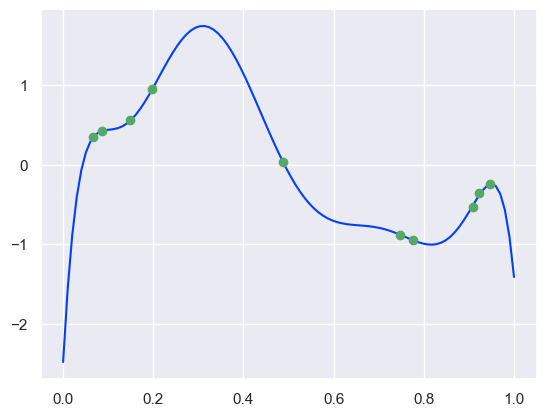

In [11]:
# Plot the polynomial regression model of degree 9 and the training data
plt.plot(x_test, list(map(lambda x: linear(x, optimal_weights(x_train, y_train, 9)), x_test)), '-')
plt.plot(x_train, y_train, 'og')

## 2) Regularization

### 2.1) Error function

`err_regularization` takes `weights`, `inputs`, `targets` and `l` (regularization term) and computes sum-of-squares error with weights regularization

In [12]:
# Define a function to compute the regularized sum of squared errors between the targets and the predictions
def err_regularization(weights, inputs, targets, l):
    # Compute the sum of squared errors using the previously defined 'err' function
    sse = err(weights, inputs, targets)
    
    # Add the regularization term to the sum of squared errors
    sse_reg = sse + l * np.sum(weights**2)
    
    return sse_reg

`erms_regularization` is a regularization version of a root mean squares error

In [13]:
# Define a function to compute the regularized RMSE between the targets and the predictions
def erms_regularization(weights, inputs, targets, l):
    # Compute the regularized sum of squared errors using the previously defined 'err_regularization' function
    sse_reg = err_regularization(weights, inputs, targets, l)
    
    # Compute the regularized RMSE by dividing the regularized sum of squared errors by the number of targets and taking the square root
    rmse_reg = np.sqrt(sse_reg / len(targets))
    
    return rmse_reg

### 2.2) Optimization

`optimial_weights_regularization` takes `inputs`, `targets`, `M` (number of weights) and `l` (regularization term)  as parameters and returns optimal weights (with regularization) for this data

In [14]:
# Define a function to compute the optimal weights for a regularized polynomial regression model
def optimal_weights_regularization(inputs, targets, M, l):
    # Compute the design matrix
    X = np.array([inputs**m for m in range(M + 1)]).T
    
    # Compute the optimal weights using the regularized least squares formula
    weights = np.linalg.pinv(X.T @ X + l * np.eye(M + 1)) @ X.T @ targets
    
    return weights

### 2.3) Test with regularization

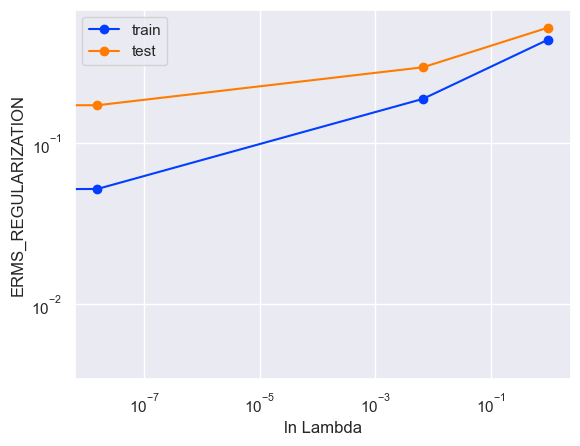

In [15]:
# Define a function to compute the regularized RMSE for the regularized polynomial regression model
def test_all_regularization(ls, M, x_train, y_train, x_test, y_test):
    results_train = []
    results_test = []
    all_weights = []
    
    # Loop over the regularization parameters in 'ls'
    for l in ls:
        # Compute the optimal weights for the regularized polynomial regression model using the 'optimal_weights_regularization()' function
        weights = optimal_weights_regularization(x_train, y_train, M, l)
        all_weights.append(weights)
        
        # Compute the regularized RMSE for the training and test data using the 'erms_regularization()' function
        error_train = erms_regularization(weights, x_train, y_train, l)
        error_test = erms_regularization(weights, x_test, y_test, l)
        results_train.append(error_train)
        results_test.append(error_test)
    
    return results_train, results_test, all_weights

ls = [0, exp(-18), exp(-5), exp(0)]

r_tr_r, r_tt_r, all_weights_r = test_all_regularization(ls, 9, x_train, y_train, x_test, y_test)

plt.plot(ls, r_tr_r, '-o', label='train')
plt.plot(ls, r_tt_r, '-o', label='test')
plt.xlabel('ln Lambda')
plt.ylabel('ERMS_REGULARIZATION')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

##### Weights for `M=9` with regularization terms `0`, `exp(-18)`, `exp(-5)`, `exp(0)`

In [16]:
# Print the transposed array of the optimal weights for each value of the regularization parameter
print(pd.DataFrame(np.transpose(all_weights_r)))

              0           1         2         3
0     -2.095875    0.699011  0.503543  0.328543
1     87.301923  -11.795682  0.743539 -0.389393
2  -1160.290965  121.043844 -2.425527 -0.353466
3   7384.955701 -335.150176 -1.908122 -0.232935
4 -22978.952705  217.987059 -0.795824 -0.127092
5  33680.849860  178.622535  0.106829 -0.046211
6 -13412.045953  -87.722822  0.719266  0.013218
7 -21742.889286 -148.839190  1.096707  0.055948
8  27096.967787  -12.387886  1.302133  0.085993
9  -8955.869020   78.207422  1.385740  0.106489


In [17]:
# Define a function to plot the regularized polynomial regression model with a given regularization parameter
def plot_by_lambda(l):
    # Plot the test data
    plt.plot(x_test, y_test, '-m')
    
    # Plot the regularized polynomial regression model using the 'linear()' function and 'optimal_weights_regularization()' function
    plt.plot(x_test, list(map(lambda x: linear(x, optimal_weights_regularization(x_train, y_train, 9, l)), x_test)), '-')
    
    # Plot the training data
    plt.plot(x_train, y_train, 'og')

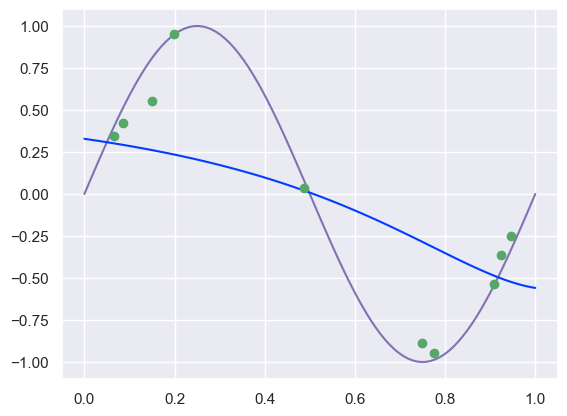

In [18]:
# Call the 'plot_by_lambda()' function with regularization parameter 1
plot_by_lambda(exp(0))

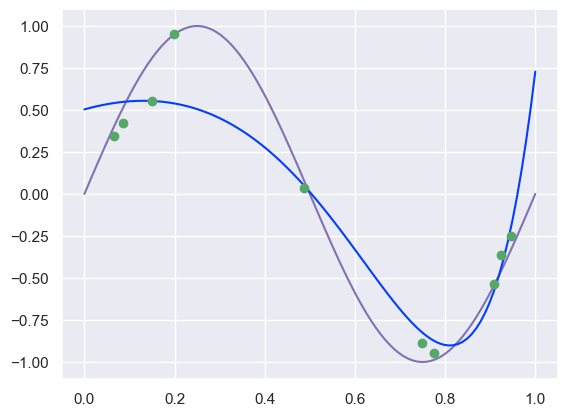

In [19]:
# Call the 'plot_by_lambda()' function with regularization parameter 0.0067
plot_by_lambda(exp(-5))

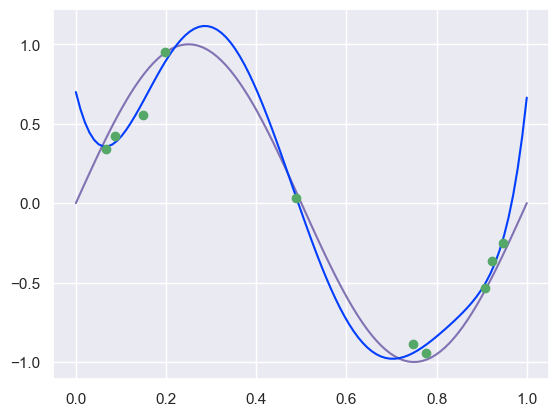

In [20]:
# Call the 'plot_by_lambda()' function with regularization parameter 2.48e-08
plot_by_lambda(exp(-18))

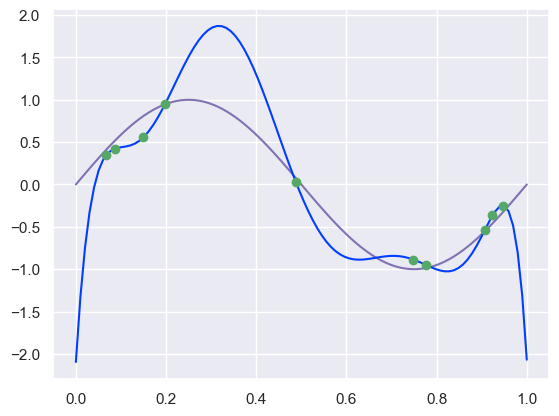

In [21]:
# Call the 'plot_by_lambda()' function with no regularization (l=0)
plot_by_lambda(0)

## 3) Model Selection

### 3.1) Cross-validation

`create_cross_validation_sets` takes `S` (number of sets) and data points `x_train`, `y_train` as parameters and returns array of sets in form `[x_sub_train, y_sub_train, x_validation, y_validation]` each

In [22]:
# Define a function to create cross-validation subsets of the training data
def create_cross_validation_sets(S, x_train, y_train):
    # Combine the input and output data into a single list and shuffle the data
    data = list(zip(x_train, y_train))
    np.random.shuffle(data)
    
    # Determine the size of each fold
    fold_size = len(data) // S
    sets = []
    
    # Create the cross-validation subsets
    for i in range(S):
        # Select the validation data for this fold
        validation_data = data[i * fold_size:(i + 1) * fold_size]
        
        # Select the training data for this fold
        training_data = data[:i * fold_size] + data[(i + 1) * fold_size:]
        x_sub_train, y_sub_train = zip(*training_data)
        
        # Separate the input and output data for the validation set
        x_validation, y_validation = zip(*validation_data)
        
        # Append the training and validation sets to the list of subsets
        sets.append((np.array(x_sub_train), np.array(y_sub_train), np.array(x_validation), np.array(y_validation)))
    
    return sets

`best_model` takes `start_M`, `end_M` (low and high limits to search for `M`), `ls` (list of regularization terms) and `sets` (cross-validation sets) and should return `(top_M, top_l, top_result_test)` with `M`, `l` and result for the best model

M = 5 lambda = 1.522997974471263e-08 erms = 0.10865182844388221


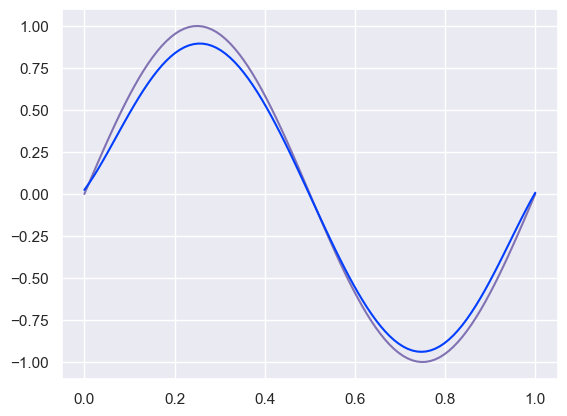

In [23]:
# Define a function to find the best polynomial regression model with regularization
def best_model(start_M, end_M, ls, sets):
    # Initialize variables to hold the best model and corresponding error
    top_M, top_l, top_result_test = 0, 0, float('inf')
    
    # Loop through all possible model and regularization parameter combinations
    for M in range(start_M, end_M + 1):
        for l in ls:
            # Compute the average error for this model and parameter on the cross-validation sets
            avg_erms = 0
            for x_sub_train, y_sub_train, x_validation, y_validation in sets:
                weights = optimal_weights_regularization(x_sub_train, y_sub_train, M, l)
                avg_erms += erms(weights, x_validation, y_validation)
            
            avg_erms /= len(sets)
            
            # If this is the best model so far, update the top model and error
            if avg_erms < top_result_test:
                top_M, top_l, top_result_test = M, l, avg_erms
                
    return top_M, top_l, top_result_test

x_cross_train, y_cross_train, _, _ = generate_data(100) 

M, l, r = best_model(0, 9, [0, exp(-18), exp(-5), exp(0)], create_cross_validation_sets(10, x_cross_train, y_cross_train))
print('M =', M, 'lambda =', l, 'erms =', r)

plt.plot(x_test, y_test, '-m')
plt.plot(x_test, list(map(lambda x: linear(x, optimal_weights_regularization(x_train, y_train, M, l)), x_test)), '-')

## 4) Bayesian curve fitting

`phi` takes `x` (data point) and `M` (number of weights) as arguments and returns a vector of powers of `x` from `0` to `M`

In [24]:
# Define a function to create the feature vector for a given input value and polynomial degree
def phi(x, M):
    # Create an array of the powers of x up to degree M
    return np.array([x**m for m in range(M + 1)])

`S` takes `alpha`, `beta`, `x` (all data points), and `M` as arguments and returns a matrix `S` that is used to compute `mean` and `variance`

In [25]:
# Define a function to compute the inverse of the matrix S for a given set of hyperparameters and input values
def S(alpha, beta, x, M):
    # Compute the feature matrix X for the input values
    X = np.array([phi(xi, M) for xi in x])
    
    # Compute the inverse of the matrix S using the formula
    return np.linalg.inv(alpha * np.eye(M + 1) + beta * X.T @ X)

`mean` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian distribution

In [26]:
# Define a function to compute the mean of the Bayesian linear regression model for a given input value
def mean(alpha, beta, x_star, x, t, M):
    # Compute the matrix S and feature vectors for the input values
    s = S(alpha, beta, x, M)
    phi_x_star = phi(x_star, M)
    X = np.array([phi(xi, M) for xi in x])
    
    # Compute the mean of the Bayesian linear regression model using the formula
    return beta * phi_x_star.T @ s @ X.T @ t

`variance` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian variance

In [27]:
# Define a function to compute the variance of the Bayesian linear regression model for a given input value
def variance(alpha, beta, x_star, x, t, M):
    # Compute the matrix S and feature vector for the input value
    s = S(alpha, beta, x, M)
    phi_x_star = phi(x_star, M)
    
    # Compute the variance of the Bayesian linear regression model using the formula
    return 1 / beta + phi_x_star.T @ s @ phi_x_star

### 4.1) Display results

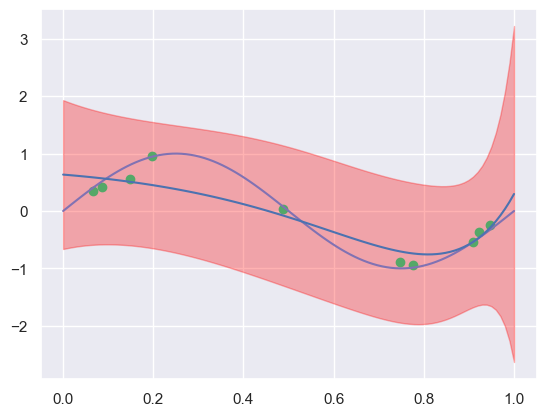

In [28]:
# Set the hyperparameters and degree of the polynomial model
alpha = 0.05
beta = 1.1
M = 9

# Compute the means and variances of the Bayesian linear regression model for a range of input values
means = np.array(list(map(lambda x: mean(alpha, beta, x, x_train, y_train, M), x_test)))
variances = np.array(list(map(lambda x: variance(alpha, beta, x, x_train, y_train, M), x_test)))

# Plot the input values, the mean predictions, and the shaded region representing the variances
plt.plot(x_train, y_train, 'og')
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, means, '-b')
plt.fill_between(x_test, means + variances, means - variances, color='red', alpha=0.3)

M = 8 lambda = 1.522997974471263e-08 erms = 0.10875174553318571


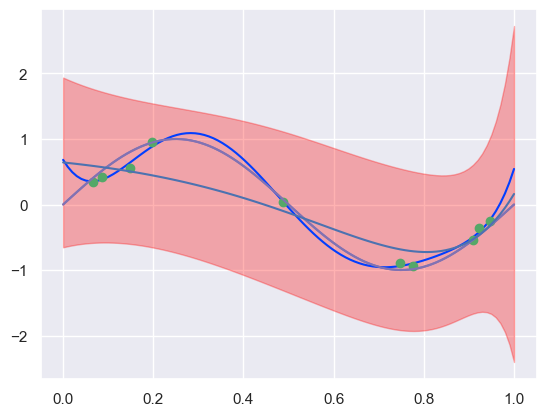

In [29]:
# Call the best_model function to obtain the optimal degree of polynomial and regularization parameter
M, l, r = best_model(0, 9, [0, np.exp(-18), np.exp(-5), np.exp(0)], create_cross_validation_sets(10, x_cross_train, y_cross_train))
print('M =', M, 'lambda =', l, 'erms =', r)

# Plot the true function and the model's predictions for the test data using the optimal M and l parameters
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, list(map(lambda x: linear(x, optimal_weights_regularization(x_train, y_train, M, l)), x_test)), '-')

# Compute the means and variances of the Bayesian linear regression model and plot them along with the data and the true function
means = np.array(list(map(lambda x: mean(alpha, beta, x, x_train, y_train, M), x_test)))
variances = np.array(list(map(lambda x: variance(alpha, beta, x, x_train, y_train, M), x_test)))

plt.plot(x_train, y_train, 'og')
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, means, '-b')
plt.fill_between(x_test, means + variances, means - variances, color='red', alpha=0.3)